# Linear Regression with Theano
Load a (50,5) dataset of floats and labels and train a 4-parameter weight matrix for linear regression

In [1]:
%matplotlib inline
import theano
import theano.tensor as tensor
import numpy as np
import matplotlib.pyplot as plt

## 1. Data Processing
Load the csv data into a np array, and print the shape.
Slice the array into response and features.

(50, 5)
(50,)
(50, 4)


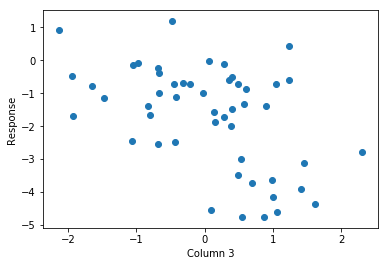

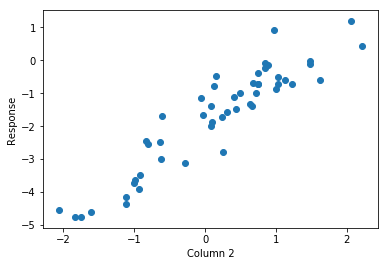

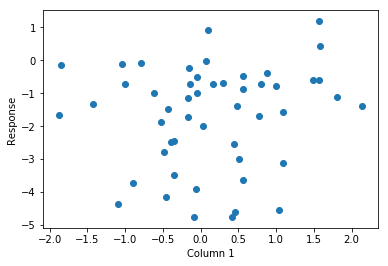

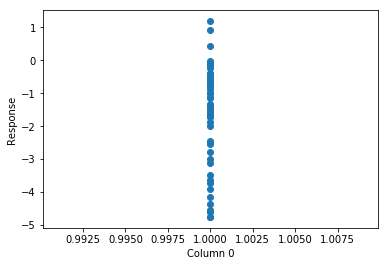

In [2]:
csv = 'linear.csv'
data = np.genfromtxt(csv, delimiter=',')
print(data.shape) # let's confirm the dimensions of the ndarray

response = data[:,0] # first column is the response Y
features = data[:,1:] # last four columns are the feature matrix X
print(response.shape)
print(features.shape)

for i in range(0,4):
    plt.scatter(features[:,i],response)
    plt.ylabel('Response')
    plt.xlabel('Column ' + str(3-i))
    plt.show()

## 2. Initialize Variables
Define the model parameters. The feature matrix should have dimension 4 and the number of samples should be 50.

In [3]:
feature_dim = features.shape[1] # feature matrix dimensions
num_samples = features.shape[0] # number of training samples
learn_rate = .5

Initialize Theano variables. `tensor.matrix` is used for a 2-dimensional ndarray and `tensor.vector` for a 1-dimensional ndarray. Higher order ndarrays are `tensor.tensor3`, ..., `tensor.tensor7`.

`theano.shared` allows us to share storage in the Shared Variable for the functions the Shared Variable appears in. This is useful to update weights.

* `x` is a 2D matrix of shape (50,4)
* `y` is a 1D vector of shape (50,1)
* `w` is a 1D vector of shape (4,1)

$w = [w_{3}, w_{2}, w_{1}, w_{0}]^{T}$

Multiplying `x` (50,4) and `w` (4,1): $x\cdot w$, gives the model's prediction.

In [4]:
# init theano variables
x = tensor.matrix(name='x') # 2D feature matrix
y = tensor.vector(name='y') # 1D response vector

# init a updatable shared variable that holds the
# values of parameters we are going to optimize
theta = theano.shared(np.zeros(shape=(feature_dim,1)), name='theta')

## 3. Define training loss and gradient
Here we use least squared error.

$\mathcal{L}_{n} = \dfrac{1}{n}\sum_{(x,y)\in \mathcal{S}_{n}}{(x\cdot w-y)^{2}}$

Note: `w` is already transposed, and has shape (4,1)

In [5]:
# define the training loss and compute the loss gradient
loss = tensor.sum((tensor.dot(x,theta).T - y)**2)/2/num_samples
grad = tensor.grad(loss, wrt=theta)

## 4. Train the model
Print the loss at every iteration to check for convergence.

Loss: 2.619322008585456
Loss: 0.7587559422725656
Loss: 0.23542812224972992
Loss: 0.07939576047330807
Loss: 0.030096896364576544
Loss: 0.013695201975103238
Loss: 0.008006092308871324
Loss: 0.005970446508700003
Loss: 0.00522593211725918
Loss: 0.004949550127903789
Loss: 0.004845924776165536
Loss: 0.00480681302996677
Loss: 0.0047919842428716195
Loss: 0.004786344307210609
Loss: 0.004784194268800789
Loss: 0.004783373170821498
Loss: 0.0047830591338786435
Loss: 0.004782938874883767
Loss: 0.004782892769416027
Loss: 0.004782875074349403
Loss: 0.004782868276122441
Loss: 0.004782865661743265
Loss: 0.004782864655366257
Loss: 0.004782864267605403
Loss: 0.0047828641180606086
Loss: 0.004782864060334
Loss: 0.004782864038030567
Loss: 0.004782864029405722
Loss: 0.004782864026067563
Loss: 0.004782864024774454
Loss: 0.004782864024273135
Loss: 0.004782864024078612
Loss: 0.004782864024003078
Loss: 0.004782864023973722
Loss: 0.0047828640239623126
Loss: 0.004782864023957866
Loss: 0.004782864023956137
Loss: 0.0

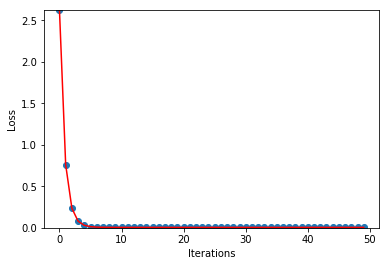

In [6]:
# run the training
train_model = theano.function(inputs=[],
			outputs=loss,
			updates=[(theta, theta-learn_rate*grad)],
			givens={x:features, y:response})

loss_vals = np.zeros(50)

for i in range(50):
    y_loss = train_model()
    if i == 0:
        ymin = y_loss
    print('Loss: ' + str(y_loss))
    loss_vals[i] = y_loss
    
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.scatter(np.arange(50),loss_vals)
plt.plot(np.arange(50),loss_vals,'r')
plt.ylim(0,ymin)
plt.show()

Print the weights of `w`.

In [7]:
print(theta.get_value())

[[-0.57392068]
 [ 1.35757059]
 [ 0.01527565]
 [-1.88288076]]


## 5. Visualize Results

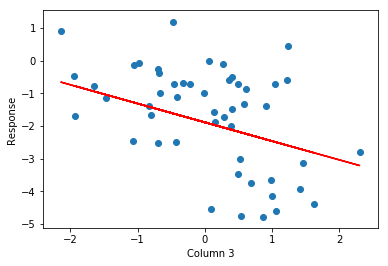

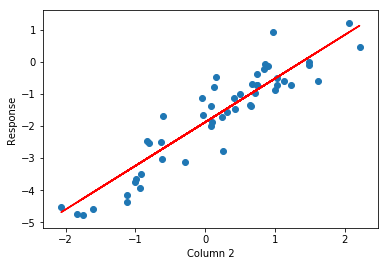

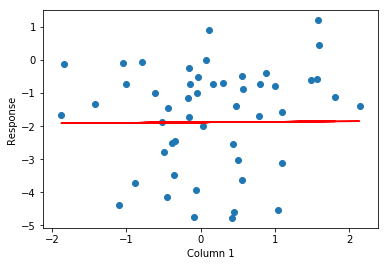

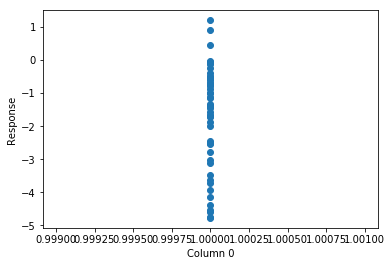

In [8]:
for i in range(0,4):
    plt.ylabel('Response')
    plt.xlabel('Column ' + str(3-i))
    
    # plot regression line
    x1 = features[:,i]
    y1 = theta.get_value()[i]*x1+theta.get_value()[3]
    plt.plot(x1,y1,'r')
    
    # plot data
    plt.scatter(features[:,i],response)
    
    plt.show()
    
plt.close()